# Health Risk Score Prediction

I worked on this project to build a machine learning model for predicting the health risk score of patients based on given health indicators. I applied linear regression along with Lasso and Ridge regularization techniques to improve the model's performance. This project is a part of my learning, practicing data preparation, exploratory analysis, feature engineering, and predictive modeling.

**Dataset**

The dataset includes the following columns:

**age:** The age of the patient.

**bmi:** Body Mass Index of the patient.

**blood_pressure:** The blood pressure of the patient.

**cholesterol:** Cholesterol levels of the patient.

**glucose:** Glucose levels of the patient.

**insulin:** Insulin levels of the patient.

**heart_rate:** Heart rate of the patient.

**activity_level:** Activity level of the patient.

**diet_quality:** Quality of diet of the patient.

**smoking_status:** Whether the patient smokes (Yes or No).

**alcohol_intake:** The amount of alcohol intake by the patient.

**health_risk_score:** A composite score representing the overall health risk of a patient (target variable).

In [7]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset

df = pd.read_csv("patient_health_data.csv")

In [6]:
# checking the number of rows and columns in the dataset

df.shape

(250, 12)

In [5]:
# Checking the first few rows of the dataset

df.head()

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,smoking_status,alcohol_intake,health_risk_score
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,No,0.824123,150.547752
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,No,0.852910,160.320350
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,Yes,4.740542,187.487398
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,No,2.226231,148.773138
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,No,3.944011,170.609655


In [9]:
# Checking for missing values

df.isnull().sum()

age                  0
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
insulin              0
heart_rate           0
activity_level       0
diet_quality         0
smoking_status       0
alcohol_intake       0
health_risk_score    0
dtype: int64

In [10]:
# Encoding the categorical variable 'smoking_status' by converting 'Yes' to 1 and 'No' to 0.

df_encoded = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)

In [12]:
df_encoded.head()

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,alcohol_intake,health_risk_score,smoking_status_Yes
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,0.824123,150.547752,0
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,0.852910,160.320350,0
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,4.740542,187.487398,1
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,2.226231,148.773138,0
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,3.944011,170.609655,0


# Training Linear Regression Models

In [13]:
# Selecting features and target variable

X = df_encoded.drop(columns=['health_risk_score'])
y = df['health_risk_score']

In [14]:
X.head()

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,alcohol_intake,smoking_status_Yes
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,0.824123,0
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,0.852910,0
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,4.740542,1
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,2.226231,0
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,3.944011,0


In [15]:
y.head()

0    150.547752
1    160.320350
2    187.487398
3    148.773138
4    170.609655
Name: health_risk_score, dtype: float64

In [16]:
# Spliting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Training and evaluating Linear Regression model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R squared: {r2_lr:.4f}")

Linear Regression R squared: 0.7644


In [23]:
# Training and evaluating Lasso Regression models

lasso_alphas = [0.01, 0.1, 1.0, 10.0]

print("Lasso Regression R-squared values:")

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print(f"Alpha {alpha}: R-squared = {r2_lasso:.4f}")

Lasso Regression R-squared values:
Alpha 0.01: R-squared = 0.7645
Alpha 0.1: R-squared = 0.7661
Alpha 1.0: R-squared = 0.7820
Alpha 10.0: R-squared = 0.7873


In [24]:
# Training and evaluating Ridge Regression models

ridge_alphas = [0.01, 0.1, 1.0, 10.0]

print("Ridge Regression R-squared values:")

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"Alpha {alpha}: R-squared = {r2_ridge:.4f}")

Ridge Regression R-squared values:
Alpha 0.01: R-squared = 0.7644
Alpha 0.1: R-squared = 0.7644
Alpha 1.0: R-squared = 0.7645
Alpha 10.0: R-squared = 0.7654


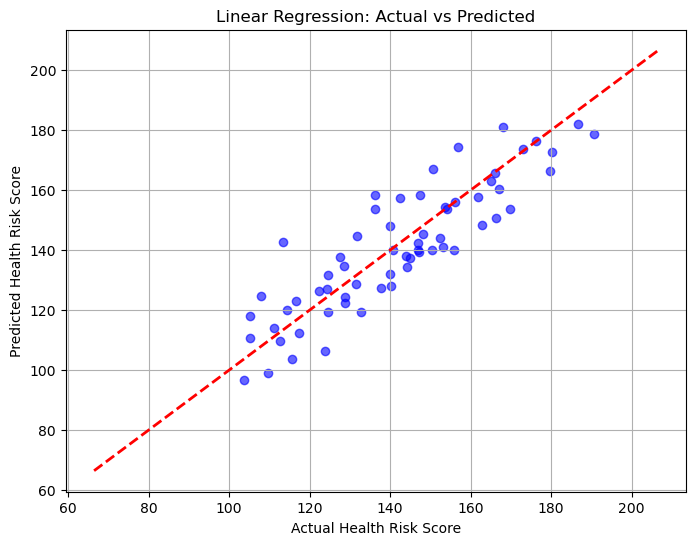

In [28]:
# Ploting the actual vs predicted values for Linear Regression

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid()
plt.show()
